In [1]:
import os
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
import html 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  ADASYN Upsampling 

In [2]:
## Data Loading 

df = pd.read_csv("C:/Users/isp/Downloads/Capstone-Project-main/Capstone-Project-main/Data Folder/clean_df")
df.head(5)

,Unnamed: 0,text,fraudulent,clean_text,token
0,0,"Marketing Intern We're Food52, and we've creat...",0,market intern be food weve create groundbreaki...,"['market', 'intern', 'be', 'food', 'weve', 'cr..."
1,1,Customer Service - Cloud Video Production 90 S...,0,customer service cloud video production second...,"['customer', 'service', 'cloud', 'video', 'pro..."
2,2,Commissioning Machinery Assistant (CMA) Valor ...,0,commission machinery assistant cma valor servi...,"['commission', 'machinery', 'assistant', 'cma'..."
3,3,Account Executive - Washington DC Our passion ...,0,account executive washington dc passion improv...,"['account', 'executive', 'washington', 'dc', '..."
4,4,Bill Review Manager SpotSource Solutions LLC i...,0,bill review manager spotsource solutions llc g...,"['bill', 'review', 'manager', 'spotsource', 's..."


In [3]:
X=df.drop(['fraudulent','text', 'token','Unnamed: 0'], axis=1)
y=df['fraudulent']

type(X)

pandas.core.frame.DataFrame

In [4]:
X.shape

(17880, 1)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = set(nltk.corpus.stopwords.words('english'))



tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(X["clean_text"])
tfidf_text_vectors.shape

(17880, 18370)

In [14]:
count_text_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(X['clean_text'])
count_text_vectors.shape




(17880, 18370)

In [15]:
from imblearn.over_sampling import SMOTE, ADASYN

adasyn = ADASYN(sampling_strategy='minority', random_state=1)

X_tf, y_tf= adasyn.fit_resample(tfidf_text_vectors, y)


X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf,y_tf, test_size=0.20,random_state=0,stratify=y_tf)



# Modeling 

## Logistic Regression tfidf

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_tf, y_train_tf)



LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3403
           1       0.98      1.00      0.99      3423

    accuracy                           0.99      6826
   macro avg       0.99      0.99      0.99      6826
weighted avg       0.99      0.99      0.99      6826



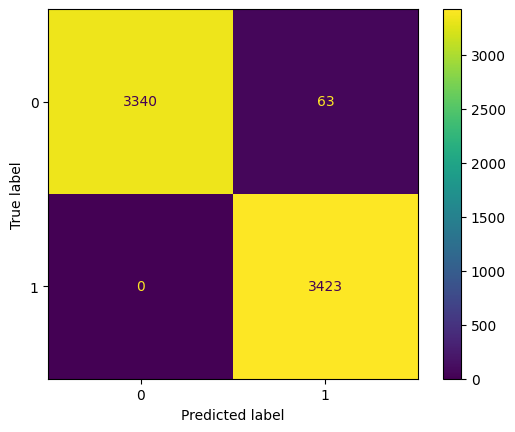

In [9]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



lr_predict = logreg.predict(X_test_tf)

print(classification_report(y_test_tf, lr_predict))


cm_lr =confusion_matrix(y_test_tf, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()




In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy", accuracy_score(y_test_tf, lr_predict))


print("F1 Score", f1_score(y_test_tf, lr_predict))
print("Precision", precision_score(y_test_tf, lr_predict))
print("Recall", recall_score(y_test_tf, lr_predict))




Accuracy 0.9907705830647524
F1 Score 0.9908814589665653
Precision 0.9819277108433735
Recall 1.0


## Random Forest tf-idf

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)



RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00      3423

    accuracy                           1.00      6826
   macro avg       1.00      1.00      1.00      6826
weighted avg       1.00      1.00      1.00      6826



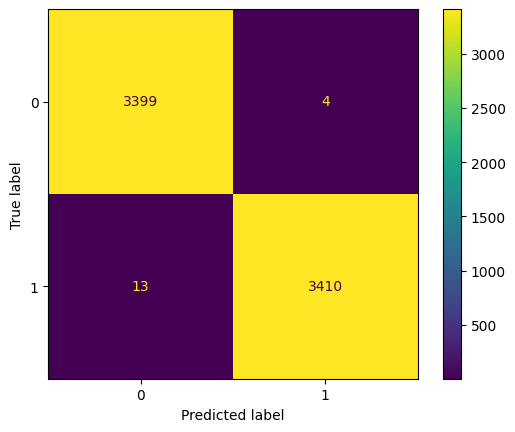

In [12]:

rf_predict = rf.predict(X_test_tf)

print(classification_report(y_test_tf, rf_predict))

cm_rf =confusion_matrix(y_test_tf, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()





In [13]:

print("Accuracy", accuracy_score(y_test_tf, rf_predict))


print("F1 Score", f1_score(y_test_tf, rf_predict))
print("Precision", precision_score(y_test_tf, rf_predict))
print("Recall", recall_score(y_test_tf, rf_predict))





Accuracy 0.9975095224142982
F1 Score 0.9975135293257277
Precision 0.9988283538371412
Recall 0.9962021618463336


## Naive Bayes tf-idf

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

NB = MultinomialNB()
NB.fit(X_train_tf, y_train_tf)



MultinomialNB()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3403
           1       0.92      1.00      0.95      3423

    accuracy                           0.95      6826
   macro avg       0.96      0.95      0.95      6826
weighted avg       0.96      0.95      0.95      6826



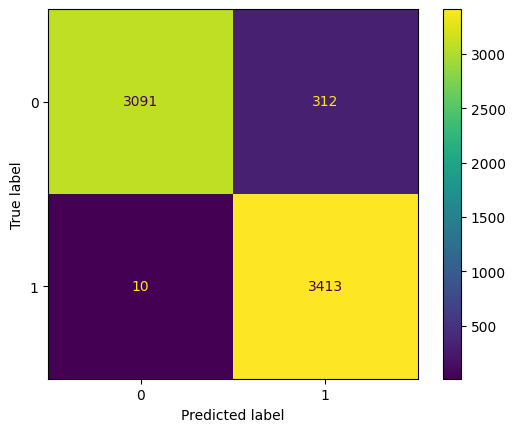

In [17]:

nb_predict = NB.predict(X_test_tf)

print(classification_report(y_test_tf, nb_predict))

cm_nb =confusion_matrix(y_test_tf, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()



In [18]:

print("Accuracy", accuracy_score(y_test_tf, nb_predict))


print("F1 Score", f1_score(y_test_tf, nb_predict))
print("Precision", precision_score(y_test_tf, nb_predict))
print("Recall", recall_score(y_test_tf, nb_predict))





Accuracy 0.952827424553179
F1 Score 0.9549524342473419
Precision 0.916241610738255
Recall 0.9970785860356413


## Multi Layer Perceptron tf-idf

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)  
mlp.fit(X_train_tf,y_train_tf)



MLPClassifier(hidden_layer_sizes=(100, 50, 2), max_iter=1000, random_state=5)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3403
           1       0.99      1.00      1.00      3423

    accuracy                           1.00      6826
   macro avg       1.00      1.00      1.00      6826
weighted avg       1.00      1.00      1.00      6826



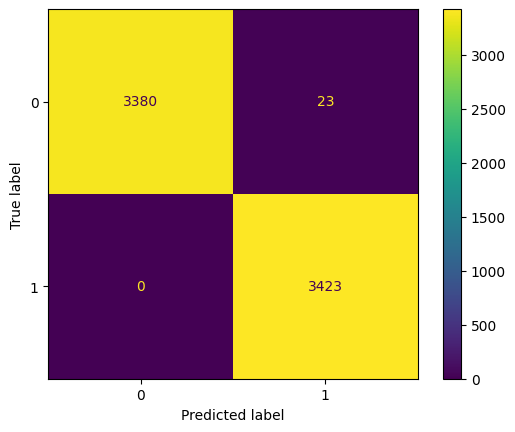

In [20]:
mlp_predict = mlp.predict(X_test_tf)

print(classification_report(y_test_tf, mlp_predict))

cm_mlp =confusion_matrix(y_test_tf, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()






In [21]:

print("Accuracy", accuracy_score(y_test_tf, mlp_predict))


print("F1 Score", f1_score(y_test_tf, mlp_predict))
print("Precision", precision_score(y_test_tf, mlp_predict))
print("Recall", recall_score(y_test_tf, mlp_predict))




Accuracy 0.9966305303252271
F1 Score 0.9966516232348231
Precision 0.9933255948926292
Recall 1.0


## KNN tf-idf

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_tf,y_train_tf)



KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      3403
           1       0.81      1.00      0.89      3423

    accuracy                           0.88      6826
   macro avg       0.90      0.88      0.88      6826
weighted avg       0.90      0.88      0.88      6826



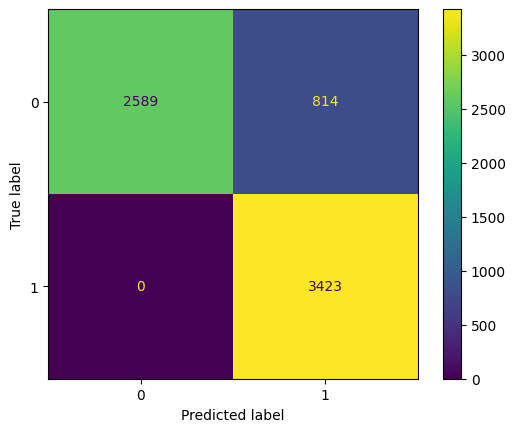

In [23]:

knn_predict = knn.predict(X_test_tf)

print(classification_report(y_test_tf, knn_predict))


cm_knn =confusion_matrix(y_test_tf, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()



In [24]:

print("Accuracy", accuracy_score(y_test_tf, knn_predict))


print("F1 Score", f1_score(y_test_tf, knn_predict))
print("Precision", precision_score(y_test_tf, knn_predict))
print("Recall", recall_score(y_test_tf, knn_predict))



Accuracy 0.8807500732493407
F1 Score 0.8937336814621409
Precision 0.8078829360396507
Recall 1.0


## Support Vector Machine tf-idf

In [25]:
from sklearn.svm import SVC

svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' )

svc.fit(X_train_tf, y_train_tf)



SVC(C=2.0, gamma='auto', kernel='linear')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3403
           1       0.99      1.00      1.00      3423

    accuracy                           1.00      6826
   macro avg       1.00      1.00      1.00      6826
weighted avg       1.00      1.00      1.00      6826



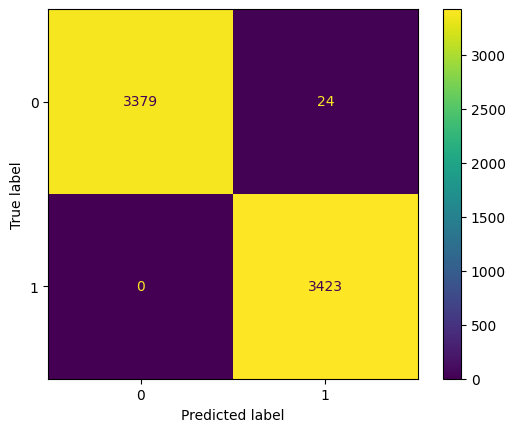

In [26]:

svm_predict = svc.predict(X_test_tf)

print(classification_report(y_test_tf, svm_predict))

cm_svm =confusion_matrix(y_test_tf, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()




In [27]:

print("Accuracy", accuracy_score(y_test_tf, svm_predict))


print("F1 Score", f1_score(y_test_tf, svm_predict))
print("Precision", precision_score(y_test_tf, svm_predict))
print("Recall", recall_score(y_test_tf, svm_predict))





Accuracy 0.9964840316437152
F1 Score 0.9965065502183406
Precision 0.9930374238468234
Recall 1.0


In [28]:
import joblib

# Save model
joblib.dump(rf, 'random_forest_1_model.pkl')

# Save the vectorizer
joblib.dump(tfidf_text_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3403
           1       0.98      0.99      0.98      3423

    accuracy                           0.98      6826
   macro avg       0.98      0.98      0.98      6826
weighted avg       0.98      0.98      0.98      6826



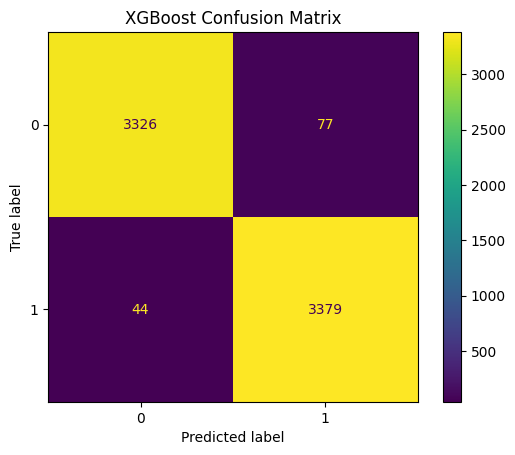

Accuracy: 0.9822736595370641
F1 Score: 0.9824102340456462
Precision: 0.9777199074074074
Recall: 0.9871457785568215


In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize and train the model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tf, y_train_tf)

# Predict
xgb_predict = xgb.predict(X_test_tf)

# Classification report
print(classification_report(y_test_tf, xgb_predict))

# Confusion matrix
cm_xgb = confusion_matrix(y_test_tf, xgb_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

# Other metrics
print("Accuracy:", accuracy_score(y_test_tf, xgb_predict))
print("F1 Score:", f1_score(y_test_tf, xgb_predict))
print("Precision:", precision_score(y_test_tf, xgb_predict))
print("Recall:", recall_score(y_test_tf, xgb_predict))


## AUC  Curve  of TF-IDF Vectorizer


from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()
plt.title("AUC Curve of ADASYN Upsample Data with TF-IDF Vectorizer")

#fit logistic regression model and plot ROC curve
lr = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_tf, y_train_tf)
y_pred_lr = lr.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_tf, y_train_tf)
y_pred_svc = svc.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_tf, y_train_tf)
y_pred_knn = knn.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)
y_pred_rf = rf.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_tf,y_train_tf)
y_pred_mlp = mlp.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))


nb = MultinomialNB()
nb.fit(X_train_tf, y_train_tf)
y_pred_nb = nb.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()





In [32]:
import joblib

# Save model
joblib.dump(mlp, 'mlp_fake_job_1_model.pkl')


['mlp_fake_job_1_model.pkl']